In [1]:
%run common_init.py

Start import
Host: DESKTOP-URE1BBI.localdomain
Setting tmp folder to /tmp/
Done import
SYSTEM
	Running on linux
	Python version 3.8.2 (default, Mar 26 2020, 15:53:00) [GCC 7.3.0]
	Python installation /home/joran/miniconda3/envs/dddm_py38/bin/python
MODULES
	DirectDmTargets
		ver.:	0.3.0
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/



In [2]:
import wimprates as wr
wr.__version__

'0.3.2'

In [3]:
import numericalunits as nu

In [4]:
import time

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from tqdm import tqdm

# Finding the correct 'factor' #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

25 october 2019 

## Goal ## 
- in the DetectorSpectrum-class a factor is used to rebin the DM-spectrum. This rebinning should be fine enough to allow the numerical integration to be sufficiently accurate. However we don't want a too fine binning as it does increase computation time drastically. 

## Result ##
A factor (the factor between the the bins used for the numerical integration and the spectrum) is set to **10** as this proved a fair trade off between speed and accuracy.

## Distribution of the DM ##
First we need to make a DM-rate spectrum (below we first compare the un-smeared and smeared spectrum)

In [7]:
use_SHM = dddm.SHM()

In [8]:
dddm.experiment['Xe_migd_bg']

{'material': 'Xe',
 'type': 'migdal_bg',
 'exp': 25,
 'cut_eff': 0.8,
 'nr_eff': 0.5,
 'E_thr': 1.0,
 'location': 'XENON',
 'res': <function DirectDmTargets.detector.det_res_XENON1T(E)>,
 'bg_func': <function DirectDmTargets.detector.migdal_background_XENON1T(e_min, e_max, nbins)>,
 'exp_eff': 10.0,
 'name': 'Xe_migd_bg'}

In [9]:
# No detector resolution
def plot_spectrum(data, color = 'blue', label = 'label', linestyle = 'none', plot_error = True):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']) if plot_error else np.zeros(len(data['counts'])),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                label = label,
                markersize=2
                )

In [10]:
# %%time
xe_events = dddm.GenSpectrum(50, 1e-45, use_SHM, dddm.experiment['Xe'])
xe_events.n_bins = 10
xe_galact = xe_events.get_data(poisson = False)
xe_galact

,counts,bin_centers,bin_left,bin_right
0,449.967244,5.0,0.0,10.0
1,172.541368,15.0,10.0,20.0
2,61.551386,25.0,20.0,30.0
3,20.377728,35.0,30.0,40.0
4,6.183479,45.0,40.0,50.0
5,1.675711,55.0,50.0,60.0
6,0.384984,65.0,60.0,70.0
7,0.066505,75.0,70.0,80.0
8,0.005831,85.0,80.0,90.0
9,0.000015,95.0,90.0,100.0


In [11]:
# ??dddm.SHM

In [12]:
use_SHM = dddm.SHM(v_0=220 * nu.km / nu.s, rho_dm = 0.3 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3 )

In [13]:
def get_gal_spec(det):
#     det_dic = {'exp': 5,
#      'cut_eff': 0.8,
#      'nr_eff': 0.5,
#      'E_thr': 10,
#      'res': dddm.det_res_Xe,
#      'exp_eff': 2.0,
#      'name':det}
#     spec_class = dddm.GenSpectrum(50, 1e-45, use_SHM, det_dic)
    spec_class = dddm.GenSpectrum(50, 1e-45, use_SHM, dddm.experiment[det])
    spec_class.E_max = 300
    spec_class.mw = 100
#     spec_class
    spec_class.n_bins = 1000
#     print(spec_class)
    return spec_class.get_data(poisson = False)

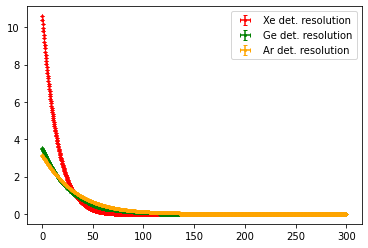

In [14]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_gal_spec('Xe'), 'red', label = 'Xe det. resolution', plot_error = False)
plot_spectrum(get_gal_spec('Ge'), 'green', label = 'Ge det. resolution', plot_error = False)
plot_spectrum(get_gal_spec('Ar'), 'orange', label = 'Ar det. resolution', plot_error = False)
plt.legend()

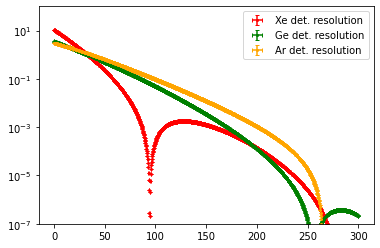

In [15]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_gal_spec('Xe'), 'red', label = 'Xe det. resolution', plot_error = False)
plot_spectrum(get_gal_spec('Ge'), 'green', label = 'Ge det. resolution', plot_error = False)
plot_spectrum(get_gal_spec('Ar'), 'orange', label = 'Ar det. resolution', plot_error = False)
plt.yscale("log")
plt.ylim(1e-7,1e2)
plt.legend()

In [16]:
# wr.rate_elastic(en, 50, 1e-45)

In [17]:
"test %s " % str(1)

'test 1 '

In [18]:
def get_det_spec(det, mw =50):
    spec_class = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.experiment[det])
    spec_class.E_max = 300
    spec_class.mw = mw
    spec_class.n_bins = 100
    return spec_class.get_data(poisson = False)

In [19]:
# %%time
# get_det_spec('Xe')

In [20]:
# # plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
# plot_spectrum(get_det_spec('Xe'), 'red', label = 'Xe det. resolution')
# plot_spectrum(get_det_spec('Ge'), 'green', label = 'Ge det. resolution')
# plot_spectrum(get_det_spec('Ar'), 'orange', label = 'Ar det. resolution')
# plt.legend()

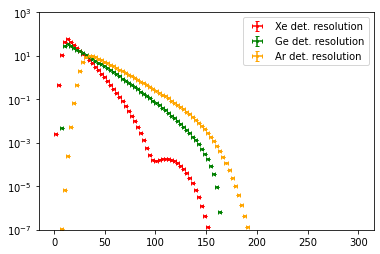

In [21]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_det_spec('Xe'), 'red', label = 'Xe det. resolution', plot_error = False)
plot_spectrum(get_det_spec('Ge'), 'green', label = 'Ge det. resolution', plot_error = False)
plot_spectrum(get_det_spec('Ar'), 'orange', label = 'Ar det. resolution', plot_error = False)
plt.yscale("log")
plt.ylim(1e-7,1e3)
plt.legend()

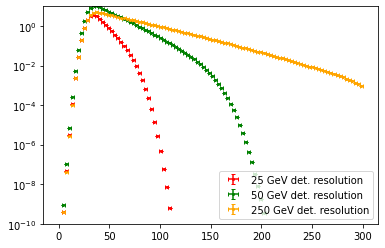

In [22]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_det_spec('Ar', mw =25), 'red', label = '25 GeV det. resolution', plot_error = False)
plot_spectrum(get_det_spec('Ar', mw =50), 'green', label = '50 GeV det. resolution', plot_error = False)
plot_spectrum(get_det_spec('Ar', mw =250), 'orange', label = '250 GeV det. resolution', plot_error = False)
plt.yscale("log")
plt.ylim(1e-10,1e1)
plt.legend()

In [23]:
def get_det_spec(det):
    spec_class = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.experiment[det])
    spec_class.E_max = 300
    spec_class.mw = 50
    spec_class.n_bins = 10
    return spec_class.get_data(poisson = False)

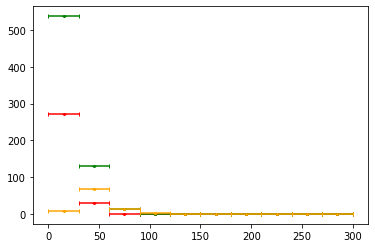

In [24]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_det_spec('Xe'), 'red', label = 'Xe det. resolution', plot_error = False)
plot_spectrum(get_det_spec('Ge'), 'green', label = 'Ge det. resolution', plot_error = False)
plot_spectrum(get_det_spec('Ar'), 'orange', label = 'Ar det. resolution', plot_error = False)


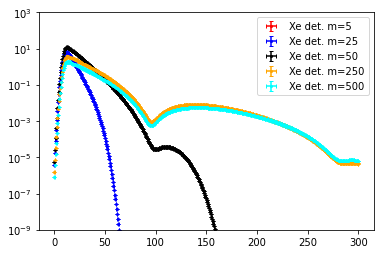

In [25]:
def get_det_spec(det, mass):
    spec_class = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.experiment[det])
    spec_class.E_max = 300
    spec_class.mw = mass
    spec_class.n_bins = 500
    return spec_class.get_data(poisson = False)

cols = ['red', 'blue', 'black', 'orange', 'cyan']
for i, m in enumerate([5,25,50,250, 500]):
    plot_spectrum(get_det_spec('Xe', m), cols[i], label = 'Xe det. m=%i'%m, plot_error = False)
plt.yscale("log")
plt.ylim(1e-9,1e3)
plt.legend()

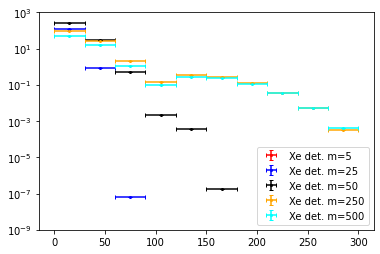

In [27]:
def get_det_spec(det, mass):
    spec_class = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.experiment[det])
    spec_class.E_max = 300
    spec_class.mw = mass
    spec_class.n_bins = 10
    return spec_class.get_data(poisson = False)

cols = ['red', 'blue', 'black', 'orange', 'cyan']
for i, m in enumerate([5,25,50,250, 500]):
    plot_spectrum(get_det_spec('Xe', m), cols[i], label = 'Xe det. m=%i'%m, plot_error = False)
plt.yscale("log")
plt.ylim(1e-9,1e3)
plt.legend()

## Finding the correct factor ##

In [28]:
factors = np.array([4,8,10,25,50,100,1000])
results = {}
for factor in tqdm(factors):
    start = time.time()
    xe_ev = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.experiment['Xe'])
    xe_ev.rebin_factor = factor
    xe_ev.n_bins = 100
    xe_res = xe_ev.get_data(poisson = False)
    end = time.time()
    
    results[factor] = {'time':end-start, "data":xe_res}
    

100%|██████████| 7/7 [09:26<00:00, 80.89s/it] 


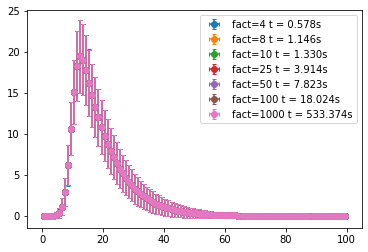

In [29]:
def plot_results(data, label = 'label'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']),
                linestyle = 'none',
                capsize = 2,
                marker = 'o',
                label = label
                )
for res in results.keys():
    plot_results(results[res]['data'], f"fact={res} t = %.3fs"%results[res]['time'])
plt.legend()

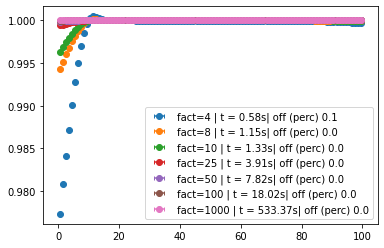

In [30]:
def plot_results_compare(data, data2, label = 'label'):
    off_percent = 100 - 100 * np.mean(np.abs(data['counts']/data2['counts']))
    plt.errorbar(data['bin_centers'], data['counts']/data2['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
#                 yerr = np.sqrt(data['counts'])/data2['counts'],
                linestyle = 'none',
                capsize = 2,
                marker = 'o',
                label = label + "| off (perc) %.1f"%off_percent
                )
    
for res in results.keys():
    plot_results_compare(results[res]['data'], 
                         results[np.max(factors)]['data'], 
                         f"fact={res} | t = %.2fs"%results[res]['time'])
plt.legend()

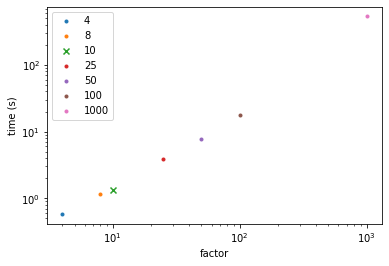

In [31]:
for x in results.keys():
    plt.scatter(x, results[x]['time'], label = x, 
                marker = "x" if x == 10 else ".")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("time (s)")
plt.xlabel("factor")
plt.legend()